Ejemplo de EDA: Análisis Exploratorio de Datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Carga de archivo CSV desde una URL de Git Hub

In [ ]:
url = 'https://raw.githubusercontent.com/Samu808/AnalisisDeDatosE/refs/heads/main/countries%20(1).csv'
df = pd.read_csv(url)
df.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai


#Conocer información básica

In [ ]:
print(" Cantidad de filas y columnas del dataframe: ", df.shape)

 Cantidad de filas y columnas del dataframe:  (252, 19)


In [ ]:
print("Nombres de las columnas: ", df.columns)

Nombres de las columnas:  Index(['alpha_2', 'alpha_3', 'area', 'capital', 'continent', 'currency_code',
       'currency_name', 'eqivalent_fips_code', 'fips', 'geoname_id',
       'languages', 'name', 'neighbours', 'numeric', 'phone', 'population',
       'postal_code_format', 'postal_code_regex', 'tld'],
      dtype='object')


In [ ]:
df.head(15)

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai
5,AL,ALB,28748.0,Tirana,EU,ALL,Lek,NaN,AL,783754,"sq,el",Albania,"MK,GR,ME,RS,XK",8,355,2986952,NaN,NaN,.al
6,AM,ARM,29800.0,Yerevan,AS,AMD,Dram,NaN,AM,174982,hy,Armenia,"GE,IR,AZ,TR",51,374,2968000,######,^(\d{6})$,.am
7,AO,AGO,1246700.0,Luanda,AF,AOA,Kwanza,NaN,AO,3351879,pt-AO,Angola,"CD,NA,ZM,CG",24,244,13068161,NaN,NaN,.ao
8,AQ,ATA,14000000.0,NaN,AN,NaN,NaN,NaN,AY,6697173,NaN,Antarctica,NaN,10,NaN,0,NaN,NaN,.aq
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,NaN,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar


In [ ]:
df.describe()

,area,geoname_id,numeric,population
count,2.520000e+02,2.520000e+02,252.000000,2.520000e+02
mean,5.952879e+05,2.427870e+06,434.309524,2.727679e+07
std,1.904818e+06,1.632093e+06,254.663139,1.164127e+08
min,0.000000e+00,4.951800e+04,0.000000,0.000000e+00
25%,1.098000e+03,1.163774e+06,217.000000,1.879528e+05
50%,6.489450e+04,2.367967e+06,436.000000,4.268583e+06
75%,3.622245e+05,3.478296e+06,652.500000,1.536688e+07
max,1.710000e+07,8.505033e+06,894.000000,1.330044e+09


# Matriz de Correlación

In [ ]:
corr = df.set_index("alpha_3").corr(numeric_only=True)
corr

,area,geoname_id,numeric,population
area,1.000000,0.120399,-0.089264,0.412864
geoname_id,0.120399,1.000000,0.038707,-0.066105
numeric,-0.089264,0.038707,1.000000,-0.041140
population,0.412864,-0.066105,-0.041140,1.000000


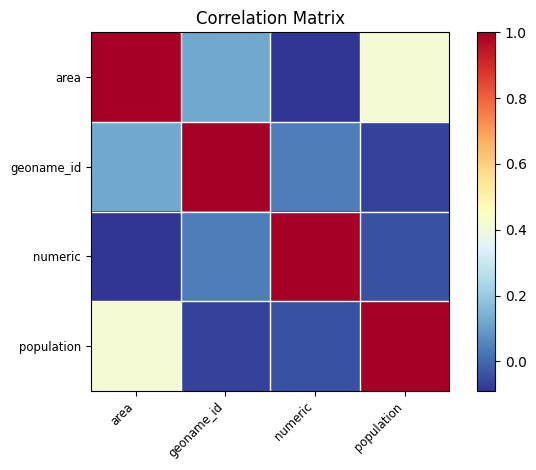

In [ ]:
sm.graphics.plot_corr(corr, xnames = list(corr.columns))
plt.show()